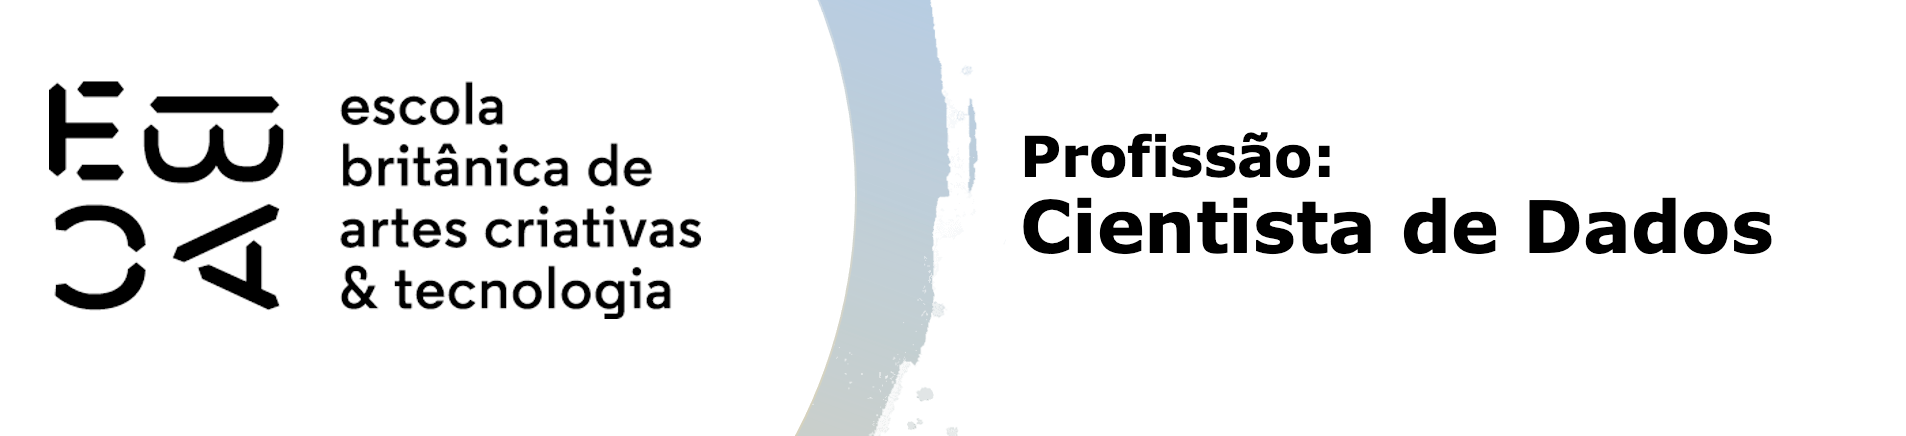

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
display(dados.head())
dados.shape

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


(750000, 13)

## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
display(dados.isna().sum())

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [4]:
med_col = dados.tempo_emprego.mean()
dados['tempo_emprego'].fillna(med_col.mean(),inplace=True)

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [5]:
meses=dados.index.unique().sort_values(ascending=True).tolist()
print(f'Período selecionado para base holdout: {meses[-3:]}')
df_teste = dados[dados.index.isin(meses[-3:])]
display(df_teste.index.unique().sort_values(ascending=True))
display(df_teste.shape)
display(df_teste.head())
df=df_teste[['renda','tempo_emprego']]
display(df.head())

Período selecionado para base holdout: ['2016-01-01', '2016-02-01', '2016-03-01']


Index(['2016-01-01', '2016-02-01', '2016-03-01'], dtype='object', name='data_ref')

(150000, 13)

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61
2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35
2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47
2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82
2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03


,renda,tempo_emprego
data_ref,,
2016-01-01,2137.61,7.746165
2016-01-01,13884.35,9.301370
2016-01-01,11042.47,10.967123
2016-01-01,1333.82,5.553425
2016-01-01,17633.03,9.265753


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res = smf.ols('renda ~ tempo_emprego',data=df).fit()
print(f"R² ajustado: {res.rsquared_adj:.3f}")
res.summary()

R² ajustado: 0.306


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 6.604e+04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:17:29   Log-Likelihood:            -1.6985e+06
No. Observations:              150000   AIC:                         3.397e+06
Df Residuals:                  149998   BIC:                         3.397e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9313.1077     83.602   -111.398      0.000   -9476.967   -9149.249
tempo_emprego  2178.8028      8.478    256.991      0.000    2162.186    2195.420
==============================================================================
Omnibus:                   308752.272   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1599323504.132
Skew:                          17.350   Prob(JB):                         0.00
Kurtosis:                     507.666   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

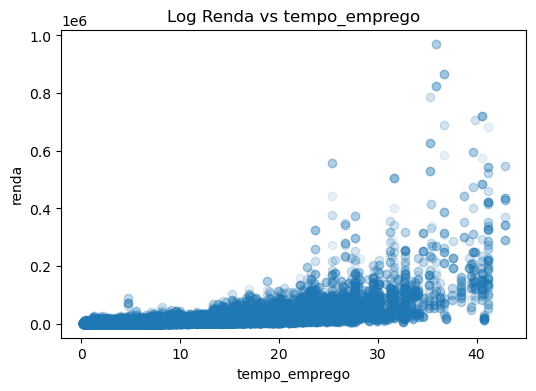

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(x=df.tempo_emprego, y=df.renda, label='tempo_emprego',alpha=.1)
ax.set_xlabel('tempo_emprego')
ax.set_ylabel('renda')
ax.set_title('Log Renda vs tempo_emprego')
plt.show();

#### Observações
O R² ajustado de 0.306 indica que apenas 30,6% podem ser explicados pelo modelo. Isso sugere que o modelo não apresenta um bom ajuste para os dados e que outras variáveis devem ser consideradas ou o modelo deve ser reformulado para obter uma melhor adequação aos dados.<br>
Optamos por fazer uma transformação na variável resposta **y** a fim de linearizar o modelo com a função de log.

In [8]:
df['y']=np.log(df.renda)
res = smf.ols('y ~ tempo_emprego',data=df).fit()
print(f"R² ajustado: {res.rsquared_adj:.3f}")
resumo = res.summary()
display(resumo.tables[0])
IC = res.get_prediction()
display(IC.summary_frame())
df['y_true']=IC.summary_frame().iloc[:, 0]

R² ajustado: 0.522


Dep. Variable:,y,R-squared:,0.522
Model:,OLS,Adj. R-squared:,0.522
Method:,Least Squares,F-statistic:,1.635e+05
Date:,"Tue, 25 Apr 2023",Prob (F-statistic):,0.00
Time:,15:17:30,Log-Likelihood:,-1.7066e+05
No. Observations:,150000,AIC:,3.413e+05
Df Residuals:,149998,BIC:,3.413e+05
Df Model:,1,,
Covariance Type:,nonrobust,,


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
data_ref,,,,,,
2016-01-01,8.100095,0.001949,8.096275,8.103915,6.620575,9.579616
2016-01-01,8.301114,0.002011,8.297172,8.305056,6.821593,9.780635
2016-01-01,8.516422,0.002204,8.512103,8.520741,7.036900,9.995944
2016-01-01,7.816671,0.002072,7.812611,7.820732,6.337150,9.296192
2016-01-01,8.296511,0.002008,8.292574,8.300447,6.816990,9.776031
...,...,...,...,...,...,...
2016-03-01,8.218957,0.001971,8.215094,8.222820,6.739437,9.698478
2016-03-01,8.100095,0.001949,8.096275,8.103915,6.620575,9.579616
2016-03-01,8.516776,0.002204,8.512456,8.521096,7.037254,9.996298


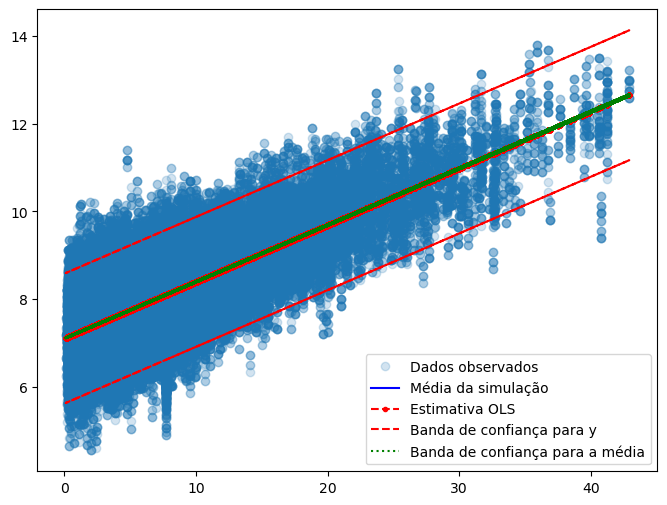

In [9]:
def esp_vs_obs(data=df):
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(data.tempo_emprego, data.y, "o", label="Dados observados",alpha=.2)
    ax.plot(data.tempo_emprego, data.y_true, "b-", label="Média da simulação")
    ax.plot(data.tempo_emprego, res.fittedvalues, "r--.", label="Estimativa OLS")
    ax.plot(data.tempo_emprego, iv_u, "r--", label = 'Banda de confiança para y')
    ax.plot(data.tempo_emprego, iv_l, "r--")
    ax.plot(data.tempo_emprego, m_u, "g:", label='Banda de confiança para a média')
    ax.plot(data.tempo_emprego, m_l, "g:")
    ax.legend(loc="best")
    plt.show

esp_vs_obs();

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [10]:
# Categorizando a variável tempo_emprego em 20 quantis
df['cat'] , quebras = pd.qcut(df.tempo_emprego, 20, duplicates='drop', retbins=True)

# Criando uma tabela de perfil
perfil = pd.DataFrame({'qt_obs': df.groupby('cat').size(),
                       'med_log_renda': df.groupby('cat')['renda'].apply(lambda x: np.mean(np.log1p(x))),
                       'med_tempo_emprego': df.groupby('cat')['tempo_emprego'].mean(),
                       'y_true':  df.groupby('cat')['y_true'].mean()})
perfil

,qt_obs,med_log_renda,med_tempo_emprego,y_true
cat,,,,
"(0.11699999999999999, 0.827]",7601,7.203584,0.520903,7.166190
"(0.827, 1.468]",7464,7.258018,1.134215,7.245464
"(1.468, 2.099]",7459,7.402569,1.790156,7.330248
"(2.099, 2.912]",7511,7.472760,2.514075,7.423819
"(2.912, 3.636]",7507,7.579367,3.299975,7.525401
"(3.636, 4.304]",7545,7.661167,3.994033,7.615111
"(4.304, 4.945]",7420,7.735224,4.624617,7.696618
"(4.945, 5.759]",7509,7.858246,5.370319,7.793004
"(5.759, 6.622]",7492,7.969832,6.203618,7.900713


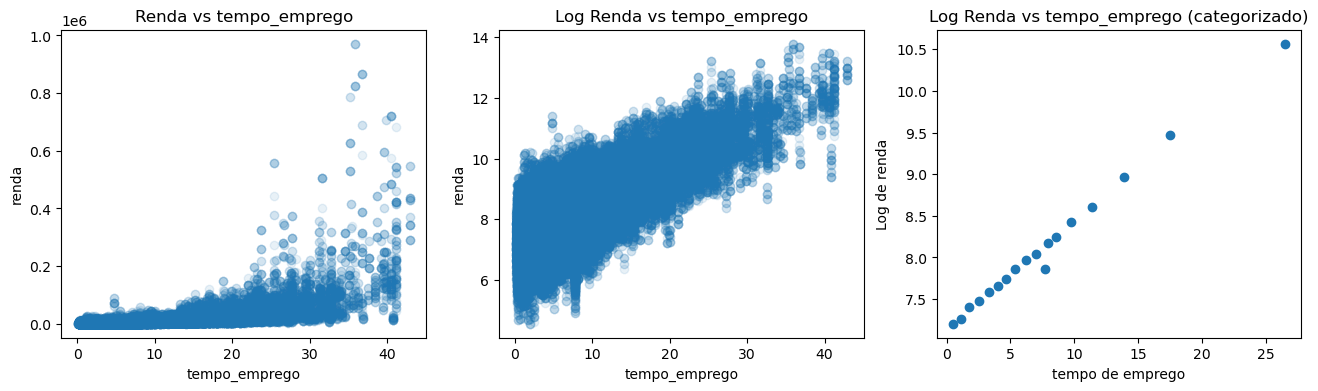

In [11]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

# Primeiro gráfico
ax1.scatter(x=df.tempo_emprego, y=df.renda, label='tempo_emprego',alpha=.1)
ax1.set_xlabel('tempo_emprego')
ax1.set_ylabel('renda')
ax1.set_title('Renda vs tempo_emprego')

# Segundo gráfico
ax2.scatter(x=df.tempo_emprego, y=df.y, label='tempo_emprego',alpha=.1)
ax2.set_xlabel('tempo_emprego')
ax2.set_ylabel('renda')
ax2.set_title('Log Renda vs tempo_emprego')

#terceiro gráfico
ax3.scatter(x=perfil.med_tempo_emprego, y=perfil.med_log_renda, label='tempo_emprego')
ax3.set_xlabel('tempo de emprego')
ax3.set_ylabel('Log de renda')
ax3.set_title('Log Renda vs tempo_emprego (categorizado)')

plt.show();


##### Conclusão
O R² ajustado de 0.306 indica que apenas 30,6% podem ser explicados pelo modelo. Isso sugere que o modelo não apresenta um bom ajuste para os dados e que outras variáveis devem ser consideradas ou o modelo deve ser reformulado para obter uma melhor adequação aos dados.<br>
Após a transformação na variável resposta y foi possível linearizar o modelo com a função de log, fazendo com que o R² ajustado passasse a 0.522, explicando 52,2% dos fenômenos.<br>
Após estes ajustes foi possível verificar que a média de renda aumenta à medida que o tempo médio de emprego também aumenta, ficando ainda mais evidente após a categorização da variável _log Renda_.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.

### Transformações da variável X


In [12]:
def esp_vs_obs(nome_dataframe):
    print(f'R².........: {res.rsquared:.2%}')
    print(f'R² ajustado: {res.rsquared_adj:.2%}')
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(nome_dataframe.x, nome_dataframe.y, "o", label="Dados observados",alpha=.5)
    ax.plot(nome_dataframe.x, nome_dataframe.y_true, "b-", label="Média da simulação")
    ax.plot(nome_dataframe.x, res.fittedvalues, "r--.", label="Estimativa OLS")
    ax.plot(nome_dataframe.x, iv_u, "r--", label = 'Banda de confiança para y')
    ax.plot(nome_dataframe.x, iv_l, "r--")
    ax.plot(nome_dataframe.x, m_u, "g:", label='Banda de confiança para a média')
    ax.plot(nome_dataframe.x, m_l, "g:")
    ax.legend(loc="best")
    plt.show()

### Redução do número de observações

Digite o número de quartis:500


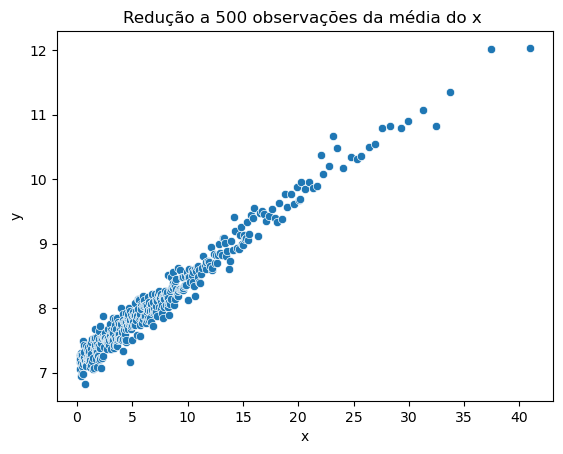

In [13]:
quartis = int(input('Digite o número de quartis:'))
df['cat'] , quebras = pd.qcut(df.tempo_emprego, quartis, duplicates='drop', retbins=True)

# Criando uma tabela de perfil
df_t = pd.DataFrame({'qt_obs': df.groupby('cat').size(),
                       'y': df.groupby('cat')['renda'].apply(lambda x: np.mean(np.log1p(x))),
                       'x': df.groupby('cat')['tempo_emprego'].mean(),
                       'y_true':  df.groupby('cat')['y_true'].mean()})
df_t

sns.scatterplot(data=df_t, x = 'x', y = 'y')
plt.title(f'Redução a {quartis} observações da média do x ');

R².........: 97.02%
R² ajustado: 97.02%


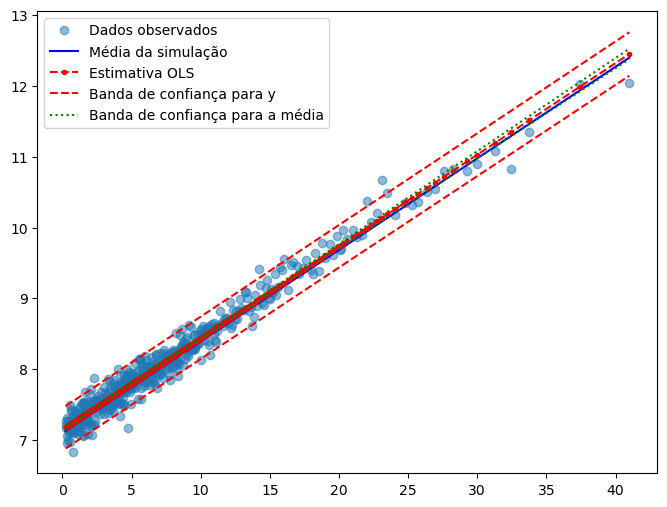

In [14]:
res = smf.ols('y ~ x',data=df_t).fit()
resumo=res.summary()
esp_vs_obs(df_t);

R².........: 97.09%
R² ajustado: 97.09%


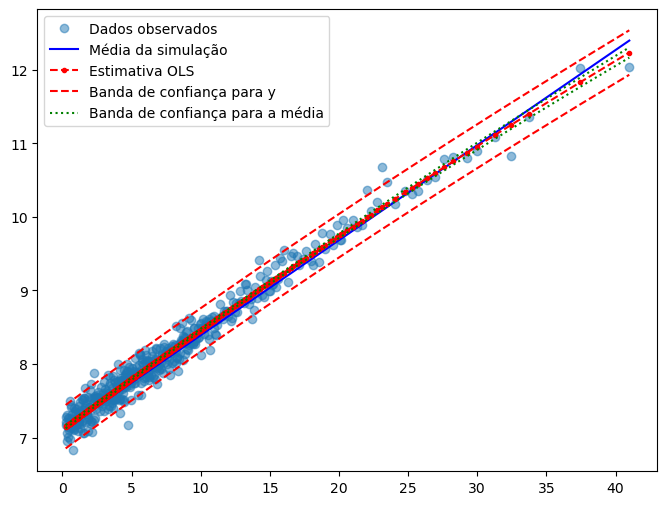

In [15]:
#Logaritmo
res = smf.ols('y ~ I(np.log(x+180))',data=df_t).fit()
esp_vs_obs(df_t);

R².........: 97.10%
R² ajustado: 97.08%


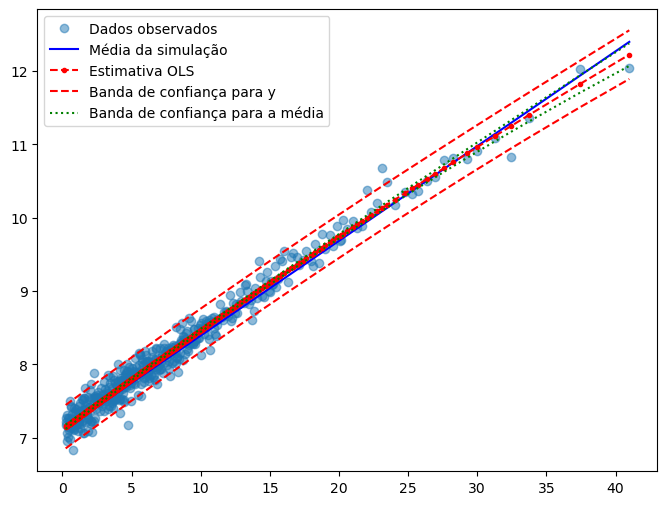

In [16]:
#Polinômio
res = smf.ols('y ~ x + I(x**2)',data=df_t).fit()
esp_vs_obs(df_t);

R².........: 97.10%
R² ajustado: 97.08%


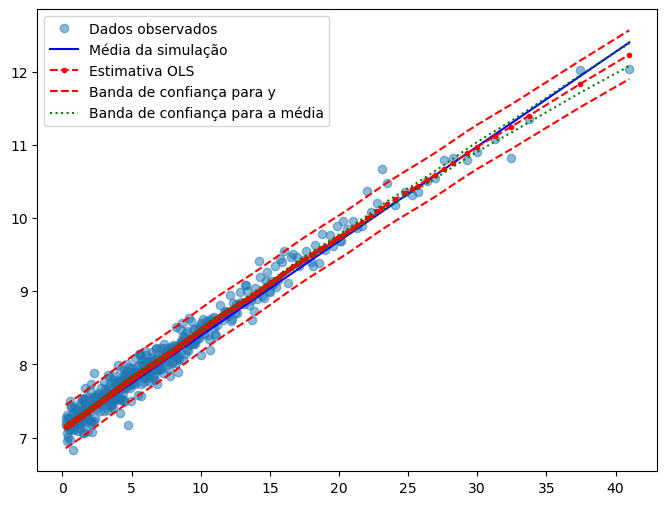

In [17]:
#Polinômio + seno(x)
res = smf.ols('y ~ x + I(x**2)+I(np.sin(x))',data=df_t).fit()
esp_vs_obs(df_t);

Melhor valor de C1: 23
R-quadrado correspondente: 97.16%
R².........: 97.16%
R² ajustado: 97.15%


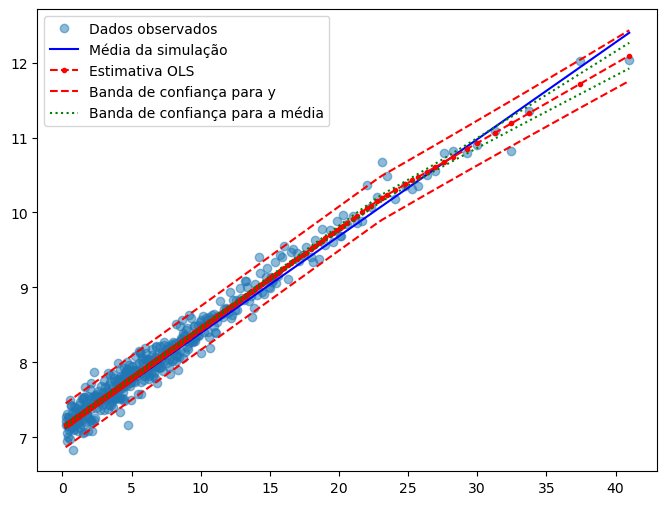

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     7106.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          9.39e-322
Time:                        15:17:43   Log-Likelihood:                 206.58
No. Observations:                 418   AIC:                            -407.2
Df Residuals:                     415   BIC:                            -395.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1292      0.012    589.952      0.000       7.105       7.153
X1_1           0.1328      0.001     98.717      0.000       0.130       0.135
X1_2           0.1061      0.005     20.243      0.000       0.096       0.116
==============================================================================
Omnibus:                        3.945   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                4.724
Skew:                          -0.048   Prob(JB):                       0.0942
Kurtosis:                       3.512   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Ajuste de quebra na curva de observações
c1_values = list(range(1, 30))
results = {}
for c1 in c1_values:
    df_t['X1_1'] = (df_t.x<=c1)*df_t.x + (df_t.x>c1)*c1
    df_t['X1_2'] = (df_t.x<=c1)*0 + (df_t.x>c1)*(df_t.x-c1)
    res = smf.ols('y ~ X1_1 + X1_2',data=df_t).fit()
    r_squared = res.rsquared
    results[c1] = r_squared
best_c1 = max(results, key=results.get)
best_r_squared = results[best_c1]
print(f"Melhor valor de C1: {best_c1}")
print(f"R-quadrado correspondente: {best_r_squared:.2%}")

# C1=best_c1

df_t['X1_1'] = (df_t.x<=best_c1)*df_t.x + (df_t.x>best_c1)*best_c1
df_t['X1_2'] = (df_t.x<=best_c1)*0 + (df_t.x>best_c1)*(df_t.x-best_c1)

# res = sm.OLS(y, x).fit()
res = smf.ols('y ~ X1_1 + X1_2',data=df_t).fit()

esp_vs_obs(df_t);
res.summary()


R-quadrado: 97.17%
R².........: 97.17%
R² ajustado: 97.14%


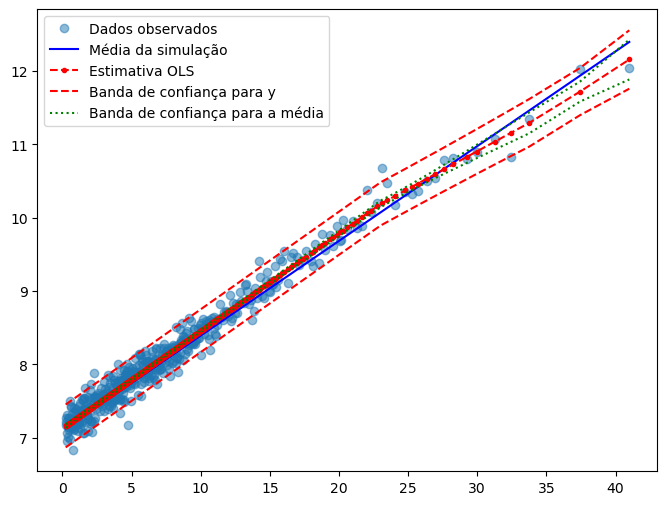

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     4730.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          7.43e-320
Time:                        15:17:43   Log-Likelihood:                 206.76
No. Observations:                 418   AIC:                            -405.5
Df Residuals:                     414   BIC:                            -389.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1284      0.012    585.697      0.000       7.104       7.152
X1_1           0.1330      0.001     96.969      0.000       0.130       0.136
X1_2           0.1029      0.007     13.878      0.000       0.088       0.117
X1_3           0.1229      0.028      4.363      0.000       0.067       0.178
==============================================================================
Omnibus:                        3.661   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                4.273
Skew:                          -0.047   Prob(JB):                        0.118
Kurtosis:                       3.486   Cond. No.                         37.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
C1=best_c1
C2 = 35

df_t['X1_1'] = (df_t.x<=C1)*df_t.x + (df_t.x>C1)*C1
df_t['X1_2'] = (df_t.x<=C1)*0 + ((df_t.x>C1) & (df_t.x<=C2))*(df_t.x-C1) + (df_t.x>C2)*(C2-C1)
df_t['X1_3'] = (df_t.x<=C2)*0 + (df_t.x>C2)*(df_t.x-C2)

# res = sm.OLS(y, x).fit()
res = smf.ols('y ~ X1_1 + X1_2 + X1_3',data=df_t).fit()
print(f'R-quadrado: {res.rsquared:.2%}')
esp_vs_obs(df_t);
res.summary()

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

Apesar dos modelos apresentarem pouca variação entre si, a grande quantidade de dados da base **(150.000)** dificultava a visualização das informações. Portanto, optou-se por reduzir o número de observações para a média das variáveis, a fim de melhorar a clareza e a interpretação dos resultados.